# **WHR Dataset**
Data source: https://worldhappiness.report/ed/2022/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/LeeHanByeol/COSE362/main/DataForTable2.1.csv")

df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [ ]:
# Missing value interpolation: mean value
df.fillna(df.mean(), inplace=True)

<ipython-input-3-7628ff283c89>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


# **1. Regression: Whole data**



In [ ]:
# Train : Validation : Test = 6 : 2 : 2
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:1253]     # 1253 train data
df_val   = df.iloc[1253:1671] # 418  validation data
df_test  = df.iloc[1671:]     # 418  test data

In [ ]:
# Training: Linear regression, Gradient descent

# parameters
Nt = 1253   # Number of training data
Nv = 418    # Number of validation data
d = 9       # Number of features
eta = 0.02  # learning rate
epo = 700  # training epochs

In [ ]:
# preprocess
train = df_train.iloc[:, 2:] # 필요없는 label 데이터 제거
train = (train - train.mean()) / train.std() # 데이터 전처리: 정규화

x_t = np.c_[np.ones((Nt, 1)), train.iloc[:, 1:].to_numpy()] # w_0를 위해 input에 1을 추가
r_t = train.iloc[:, 0].to_numpy()[np.newaxis].T # target output vector(life ladder)

valid = df_val.iloc[:, 2:]
valid = (valid - valid.mean()) / valid.std()

x_v = np.c_[np.ones((Nv, 1)), valid.iloc[:, 1:].to_numpy()]
r_v = valid.iloc[:, 0].to_numpy()[np.newaxis].T

w = np.random.randn(d + 1, 1) # weight vector

Train loss(MSE): 0.2335
Val loss(MSE): 0.2167


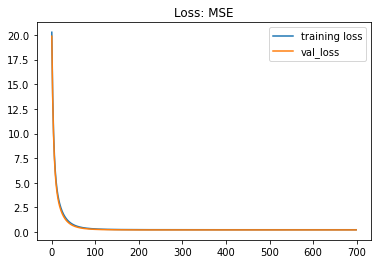

In [ ]:
# train
train_loss = []
val_loss = []

for epoch in range(epo):
  #train
  E = x_t.dot(w) - r_t  # y - r
  grad = (2 / Nt) * x_t.T.dot(E)  # calculating gradient vector, d/dW(XW - R)^2 = 2 * X^T(XW - R)
  w = w - (eta * grad)  # updating weight vector

  E = x_t.dot(w) - r_t        
  loss = np.sum(np.power(E, 2)) / Nt # MSE = 1 / N * sum[(y - r)^2]
  train_loss.append(loss)

  #validate
  E = x_v.dot(w) - r_v
  loss = np.sum(np.power(E, 2)) / Nv
  val_loss.append(loss)

print(f'Train loss(MSE): {train_loss[-1]:.4}\nVal loss(MSE): {val_loss[-1]:.4}')

plt.title('Loss: MSE')
plt.plot(train_loss, label='training loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()


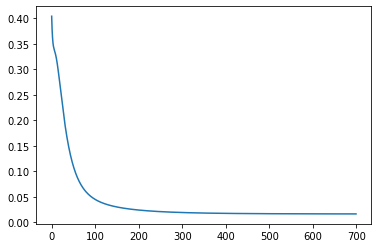

In [ ]:
#training error와 validation error 사이의 gap

gap = []
for i in range(epo):
  gap.append(train_loss[i]-val_loss[i])

plt.plot(gap)
plt.show()


In [ ]:
w # [w_0, w_1, ... , w_9]^T

array([[-4.49472503e-13],
       [ 3.81650654e-01],
       [ 1.79933823e-01],
       [ 1.45786854e-01],
       [ 1.07014090e-01],
       [ 7.48755789e-02],
       [-1.39501507e-01],
       [ 1.90954228e-01],
       [-2.16806183e-02],
       [-9.09588198e-02]])

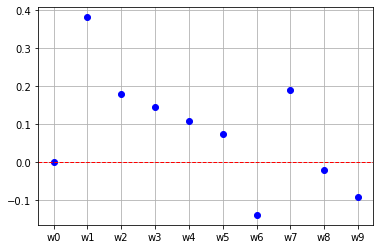

In [ ]:
plt.plot([f'w{i}' for i in range(10)], w, 'bo')
plt.axhline(0, linestyle='--', linewidth=1, c='red')
plt.grid()

plt.show()

In [ ]:
# test

test = df_test.iloc[:, 2:]
test = (test - test.mean()) / test.std()

x_s = np.c_[np.ones((Nv, 1)), test.iloc[:, 1:].to_numpy()]
r_s = test.iloc[:, 0].to_numpy()[np.newaxis].T

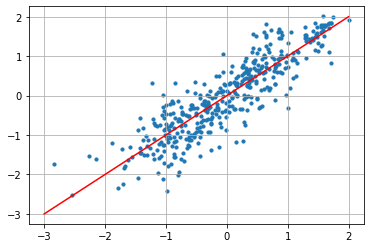

In [ ]:
#x축: prediction(y)
#y축: truth(r_s)

y = x_s.dot(w)

plt.scatter(y, r_s, s=10)
line = np.linspace(-3, 2, 10)
plt.plot(line, line+0, c='red')
plt.grid()
plt.show()

In [ ]:
E = x_s.dot(w) - r_s
loss = np.sum(np.power(E, 2)) / Nv

print(f'Test loss(MSE): {loss:.4}')

Test loss(MSE): 0.219


# **2. Regression: Whole data(K-fold Validation)**

In [ ]:
# Train : Test = 8 : 2
df = df.sample(frac=1).reset_index(drop=True)

#K-fold cross validation
df_train = df.iloc[:1672]
df_test = df.iloc[1672:]  #417 test data
k = 4

N_fold = int(1672 / k)   #Number of 1 fold data

In [ ]:
# Training: Linear regression, Gradient descent

# parameters
N_test = 417
d = 9       # Number of features
eta = 0.02  # learning rate
epo = 700  # training epochs

In [ ]:
# preprocess
train = df_train.iloc[:, 2:] # 필요없는 label 데이터 제거

fold = []              #k-fold로 train data 나눔
for i in range (k):
  s = i * N_fold
  e = (i+1) * N_fold
  fold.append(train.iloc[s:e])

fold_normalized = []    #fold data를 정규화
for i in range(k) :
  fold_normalized.append((fold[i] - fold[i].mean())/fold[i].std())


x_fold = []     
r_fold = []

for i in range(k):
  x = np.c_[np.ones((N_fold, 1)), fold_normalized[i].iloc[:, 1:].to_numpy()]
  r = fold_normalized[i].iloc[:, 0].to_numpy()[np.newaxis].T
  x_fold.append(x)
  r_fold.append(r)

print("the number of fold: ", len(x_fold))
print("shape of x in fold_n", x_fold[i].shape)
print("shape of r in fold_n", r_fold[i].shape)

w = np.random.randn(d + 1, 1) # weight vector

the number of fold:  4
shape of x in fold_n (418, 10)
shape of r in fold_n (418, 1)


Train loss(MSE): 0.1241
Val loss(MSE): 0.05413


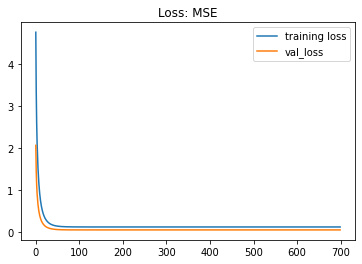

In [ ]:
from numpy.matrixlib.defmatrix import concatenate
# train
train_loss = []
val_loss = []

Nt = N_fold * (k-1)

for epoch in range(epo):

  train_E = 0
  val_E = 0
  for i in range(k):
    
    #training data 만들기 (i번째 fold를 뺀 나머지 fold를 병합)
    if i == 0 : 
      x_t = x_fold[1]
      r_t = r_fold[1]
      for j in range(2, k):
        x_t = np.concatenate((x_t, x_fold[j]), axis=0)
        r_t = np.concatenate((r_t, r_fold[j]), axis=0)
    else: 
      x_t = x_fold[0]
      r_t = r_fold[0]
      for j in range(1, k):
        if i != j:
          x_t = np.concatenate((x_t, x_fold[j]), axis=0)
          r_t = np.concatenate((r_t, r_fold[j]), axis=0)

    #train
    E = x_t.dot(w) - r_t
    grad = (2 / Nt) * x_t.T.dot(E)
    w = w - (eta * grad)
    
    train_E += x_t.dot(w) - r_t

    #validate
    val_E += x_fold[i].dot(w) - r_fold[i]

  train_E /= k
  val_E /= k

  loss = np.sum(np.power(train_E, 2)) / Nt
  train_loss.append(loss)

  loss = np.sum(np.power(val_E, 2)) /N_fold
  val_loss.append(loss)


print(f'Train loss(MSE): {train_loss[-1]:.4}\nVal loss(MSE): {val_loss[-1]:.4}')

plt.title('Loss: MSE')
plt.plot(train_loss, label='training loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

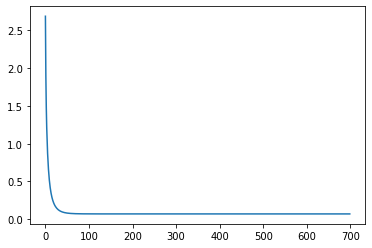

In [ ]:
gap = []
for i in range(epo):
  gap.append(train_loss[i]-val_loss[i])

plt.plot(gap)
plt.show()

In [ ]:
w # [w_0, w_1, ... , w_9]^T

array([[ 2.58166131e-16],
       [ 3.86140573e-01],
       [ 1.86008987e-01],
       [ 1.58723124e-01],
       [ 8.37820913e-02],
       [ 7.52336393e-02],
       [-1.27281490e-01],
       [ 2.08720344e-01],
       [-1.46591918e-02],
       [-9.10218027e-02]])

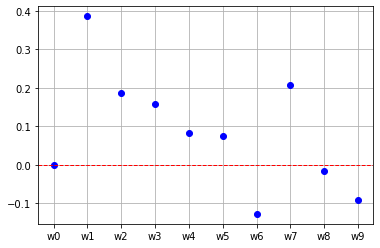

In [ ]:
plt.plot([f'w{i}' for i in range(10)], w, 'bo')
plt.axhline(0, linestyle='--', linewidth=1, c='red')
plt.grid()

plt.show()

In [ ]:
# test

test = df_test.iloc[:, 2:]
test = (test - test.mean()) / test.std()

x_s = np.c_[np.ones((N_test, 1)), test.iloc[:, 1:].to_numpy()]
r_s = test.iloc[:, 0].to_numpy()[np.newaxis].T

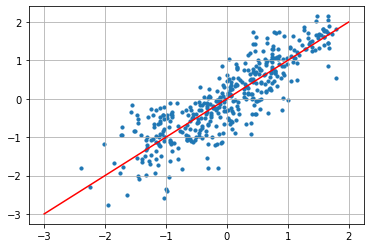

In [ ]:
y = x_s.dot(w)

plt.scatter(y, r_s, s=10)
line = np.linspace(-3, 2, 10)
plt.plot(line, line+0, c='red')
plt.grid()
plt.show()

In [ ]:
E = x_s.dot(w) - r_s
loss = np.sum(np.power(E, 2)) / N_test

print(f'Test loss(MSE): {loss:.4}')

Test loss(MSE): 0.2585


# **3. Regression: Continent**

In [ ]:
df['Country name'].unique()

array(['Ukraine', 'Bangladesh', 'Malta', 'Sweden', 'South Africa',
       'Chile', 'Finland', 'United Kingdom', 'Moldova', 'Saudi Arabia',
       'Tanzania', 'Singapore', 'Japan', 'Serbia', 'Honduras', 'Canada',
       'France', 'Turkey', 'Chad', 'Albania', 'Lithuania', 'Afghanistan',
       'Bolivia', 'Zambia', 'North Macedonia', 'Israel', 'United States',
       'Guinea', 'Germany', 'Liberia', 'Philippines', 'Spain',
       'Costa Rica', 'Nicaragua', 'Bahrain', 'Togo', 'Pakistan',
       'Mozambique', 'Indonesia', 'Egypt', 'Kenya', 'Lebanon', 'Mongolia',
       'Uruguay', 'Peru', 'Mauritania', 'Ivory Coast', 'Kyrgyzstan',
       'Belgium', 'Sierra Leone', 'Myanmar', 'Iceland', 'Somalia',
       'Ghana', 'Morocco', 'Ireland', 'Cameroon', 'Sri Lanka', 'Georgia',
       'Dominican Republic', 'Bulgaria', 'Norway',
       'Bosnia and Herzegovina', 'Venezuela', 'United Arab Emirates',
       'Azerbaijan', 'Madagascar', 'Romania', 'Tunisia', 'Mauritius',
       'Comoros', 'Botswana', 'Cambo

In [ ]:
Europe = ['Ukraine', 'Malta', 'Sweden', 'Finland', 'United Kingdom', 'Moldova', 'Serbia', 'France', 'Albania', 
          'Lithuania', 'North Macedonia', 'Germany', 'Spain', 'Belgium', 'Iceland', 'Ireland', 'Bulgaria', 
          'Norway', 'Bosnia and Herzegovina', 'Romania', 'Czechia', 'Italy', 'Slovakia', 'Hungary', 'Croatia', 
          'Estonia', 'Poland', 'Montenegro', 'Luxembourg', 'Argentina', 'Greece', 'Netherlands', 'Portugal', 
          'Belarus', 'Austria', 'Switzerland', 'Latvia', 'Denmark', 'Kosovo', 'Slovenia', ]
North_America = ['Honduras', 'Canada', 'United States', 'Costa Rica', 'Nicaragua', 'Dominican Republic', 'Mexico', 
                 'Guatemala', 'Haiti', 'Panama', 'El Salvador', 'Jamaica', 'Belize', 'Cuba', ]
South_America = ['Chile', 'Bolivia', 'Uruguay', 'Peru', 'Venezuela', 'Suriname', 'Paraguay', 'Colombia', 'Ecuador', 
                 'Brazil', 'Trinidad and Tobago', 'Guyana', ]
Africa = ['South Africa', 'Tanzania', 'Chad', 'Afghanistan', 'Zambia', 'Guinea', 'Liberia', 'Togo', 'Mozambique', 
          'Kenya', 'Mauritania', 'Ivory Coast', 'Sierra Leone', 'Somalia', 'Ghana', 'Morocco', 'Cameroon', 
          'Madagascar', 'Tunisia', 'Mauritius', 'Comoros', 'Botswana', 'Nigeria', 'Congo (Brazzaville)', 'Namibia',
          'Libya', 'Uganda', 'Burkina Faso', 'Ethiopia', 'Malawi', 'Lesotho', 'Senegal', 'Mali', 'Sudan', 'Zimbabwe', 
          'Rwanda', 'Benin', 'Djibouti', 'Gabon', 'Algeria', 'Burundi', 'Niger', 'South Sudan', 'Congo (Kinshasa)', 
          'Gambia', 'Somaliland region', 'Angola', 'Central African Republic', 'Eswatini', ]
Asia = ['Bangladesh', 'Saudi Arabia', 'Singapore', 'Japan', 'Turkey', 'Israel', 'Philippines', 'Bahrain', 
        'Pakistan', 'Indonesia', 'Egypt', 'Lebanon', 'Mongolia', 'Kyrgyzstan', 'Myanmar', 'Sri Lanka', 'Georgia',
        'United Arab Emirates', 'Azerbaijan', 'Cambodia', 'Laos', 'Malaysia', 'Yemen', 'Vietnam', 'Armenia',
        'Palestinian Territories', 'South Korea', 'Russia', 'Jordan', 'China', 'Syria', 'Cyprus', 'India', 
        'Turkmenistan', 'Kazakhstan', 'Uzbekistan', 'Tajikistan', 'Thailand', 'Taiwan Province of China', 'Bhutan', 
        'Nepal', 'Iran', 'Qatar', 'Hong Kong S.A.R. of China', 'Kuwait', 'Iraq', 'North Cyprus', 'Oman', 'Maldives']
Oceania = ['New Zealand', 'Australia', ]

In [ ]:
data = []
data.append(df[df['Country name'].isin(Europe)])
data.append(df[df['Country name'].isin(North_America)])
data.append(df[df['Country name'].isin(South_America)])
data.append(df[df['Country name'].isin(Africa)])
data.append(df[df['Country name'].isin(Asia)])
data.append(df[df['Country name'].isin(Oceania)])

In [ ]:
data[0].head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
2,Netherlands,2014,7.321188,10.862589,0.908996,71.059998,0.910180,0.329016,0.456948,0.775613,0.220657,0.525242
5,Estonia,2017,5.938396,10.428864,0.935686,68.750000,0.861749,-0.102851,0.668402,0.740096,0.160164,0.405946
10,Greece,2020,5.787616,10.204878,0.778537,71.025002,0.564614,-0.242127,0.764325,0.629382,0.321684,0.397470
11,Austria,2014,6.950000,10.876781,0.898920,70.300003,0.885027,0.115356,0.566931,0.720965,0.170150,0.407695
14,Finland,2014,7.384571,10.713902,0.952017,70.480003,0.933044,-0.003274,0.265480,0.766498,0.198814,0.468559


In [ ]:
# Training: Linear regression, Transfer learn

# parameters
#Nt = 1253   # Number of training data
#Nv = 418    # Number of validation data
#d = 9       # Number of features
#eta = 0.02  # learning rate
epo = 200  # training epochs

In [ ]:
# train
train_loss = []
weights = []

for i, data_train in enumerate(data):
  loss = []

  data_train = data_train.iloc[:, 2:]
  data_train = (data_train - data_train.mean()) / data_train.std()
  N = len(data_train)

  x = np.c_[np.ones((N, 1)), data_train.iloc[:, 1:].to_numpy()]
  r = data_train.iloc[:, 0].to_numpy()[np.newaxis].T
  weight = w # transfer

  for epoch in range(epo):
    #train
    E = x.dot(weight) - r
    grad = (2 / N) * x.T.dot(E)
    weight = weight - (eta * grad)

    E = x.dot(weight) - r
    l = np.sum(np.power(E, 2)) / N
    loss.append(l)

  train_loss.append(loss)
  weights.append(weight)

In [ ]:
print(f'''Train loss(MSE):
  Europe:\t\t{train_loss[0][-1]:.4}
  North America:\t{train_loss[1][-1]:.4}
  South America:\t{train_loss[2][-1]:.4}
  Africa:\t\t{train_loss[3][-1]:.4}
  Asia:\t\t\t{train_loss[4][-1]:.4}
  Oceania:\t\t{train_loss[5][-1]:.4}
  ''')

Train loss(MSE):
  Europe:		0.1695
  North America:	0.2343
  South America:	0.4924
  Africa:		0.6783
  Asia:			0.3714
  Oceania:		0.477
  


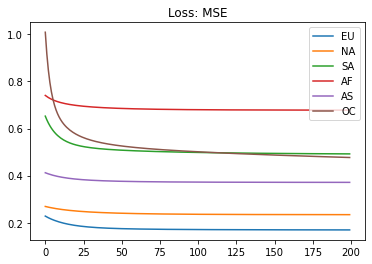

In [ ]:
plt.title('Loss: MSE')
plt.plot(train_loss[0], label='EU')
plt.plot(train_loss[1], label='NA')
plt.plot(train_loss[2], label='SA')
plt.plot(train_loss[3], label='AF')
plt.plot(train_loss[4], label='AS')
plt.plot(train_loss[5], label='OC')

plt.legend()
plt.show()

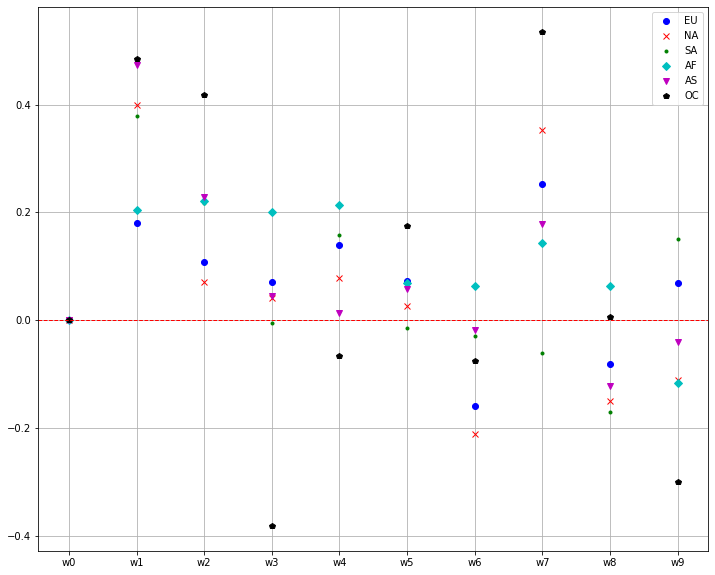

In [ ]:
plt.figure(figsize=(12, 10))

plt.plot([f'w{i}' for i in range(10)], weights[0], 'bo', label='EU')
plt.plot([f'w{i}' for i in range(10)], weights[1], 'rx', label='NA')
plt.plot([f'w{i}' for i in range(10)], weights[2], 'g.', label='SA')
plt.plot([f'w{i}' for i in range(10)], weights[3], 'cD', label='AF')
plt.plot([f'w{i}' for i in range(10)], weights[4], 'mv', label='AS')
plt.plot([f'w{i}' for i in range(10)], weights[5], 'kp', label='OC')

plt.axhline(0, linestyle='--', linewidth=1, c='red')
plt.grid()
plt.legend()

plt.show()

In [ ]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')